## Data

Data was downloaded from the JPL Small-Body Database Search Engine as of 6/28/20

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('asteroid.csv') #Importing data from csv file using pandas

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
pd.set_option('display.max_columns', None)
data.head(10) #looking at the structure of the data

,full_name,neo,pha,H,G,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,e,a,q,i,om,w,ma,ad,n,per_y,class,moid,moid_jup
0,1 Ceres,N,N,3.40,0.12,939.400,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,4.608202,MBA,1.594780,2.09753
1,2 Pallas,N,N,4.20,0.11,545.000,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,4.619880,MBA,1.234290,1.85093
2,3 Juno,N,N,5.33,0.32,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,4.358696,MBA,1.034290,2.18899
3,4 Vesta,N,N,3.00,0.32,525.400,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,3.628837,MBA,1.139480,2.46988
4,5 Astraea,N,N,6.90,NaN,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,4.129814,MBA,1.095750,1.95968
5,6 Hebe,N,N,5.80,0.24,185.180,NaN,0.2679,7.274500,NaN,0.822,0.399,NaN,S,S,0.203219,2.424533,1.931822,14.739653,138.643431,239.736273,190.686496,2.917243,0.261073,3.775290,MBA,0.973673,2.63933
6,7 Iris,N,N,5.60,NaN,199.830,NaN,0.2766,7.139000,NaN,0.855,0.484,NaN,S,S,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,3.688835,MBA,0.850693,2.47160
7,8 Flora,N,N,6.50,0.28,147.491,NaN,0.2260,12.865000,NaN,0.885,0.489,NaN,NaN,S,0.155833,2.201415,1.858362,5.889081,110.876524,285.458915,315.318013,2.544467,0.301753,3.266337,MBA,0.875980,2.87060
8,9 Metis,N,N,6.30,0.17,190.000,NaN,0.1180,5.079000,NaN,0.858,0.496,NaN,NaN,S,0.123300,2.386189,2.091972,5.576494,68.909459,6.337325,23.912204,2.680407,0.267391,3.686087,MBA,1.107110,2.55296
9,10 Hygiea,N,N,5.50,NaN,407.120,NaN,0.0717,27.630000,7.0000,0.696,0.351,NaN,C,C,0.112117,3.142435,2.790114,3.831786,283.198444,312.412932,222.850543,3.494757,0.176931,5.570674,MBA,1.780300,1.53545


In [33]:
#Dropping rows with no dimaeter values (target)
data = data.dropna(subset=['diameter'])

In [34]:
data.shape #shape of the data set

(136209, 28)

In [35]:
for col in data.columns:
    print(col, 100-data[col].isna().sum()/data.shape[0]*100) #Fraction of values missing in each column

full_name 100.0
neo 100.0
pha 100.0
H 96.94293328634672
G 0.08736573941516212
diameter 100.0
extent 0.011746654039015425
albedo 99.18581004192087
rot_per 8.214582002657679
GM 0.01027832228413672
BV 0.7378367068255471
UB 0.7084700717280015
IR 0.0007341658774322468
spec_B 1.0058072520905341
spec_T 0.7084700717280015
e 100.0
a 100.0
q 100.0
i 100.0
om 100.0
w 100.0
ma 100.0
ad 100.0
n 100.0
per_y 100.0
class 100.0
moid 100.0
moid_jup 100.0


In [36]:
#Dropping columns with less data
data = data.drop(['G', 'extent', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T'], axis = 1)

In [9]:
for col in data.columns:
    print(col, 100-data[col].isna().sum()/data.shape[0]*100) #Fraction of values available in each column

full_name 100.0
neo 100.0
pha 100.0
H 96.94293328634672
diameter 100.0
albedo 99.18581004192087
e 100.0
a 100.0
q 100.0
i 100.0
om 100.0
w 100.0
ma 100.0
ad 100.0
n 100.0
per_y 100.0
class 100.0
moid 100.0
moid_jup 100.0


In [37]:
data.isnull().sum(axis=1).value_counts() #Number of rows with no data in any column

0    131237
1      4671
2       301
dtype: int64

In [38]:
data = data[data['H'].notna()]
data = data[data['albedo'].notna()]
data #Rows with data for 'H' and 'albedo'

,full_name,neo,pha,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,class,moid,moid_jup
0,1 Ceres,N,N,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,4.608202,MBA,1.594780,2.097530
1,2 Pallas,N,N,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,4.619880,MBA,1.234290,1.850930
2,3 Juno,N,N,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,4.358696,MBA,1.034290,2.188990
3,4 Vesta,N,N,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,3.628837,MBA,1.139480,2.469880
4,5 Astraea,N,N,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,4.129814,MBA,1.095750,1.959680
5,6 Hebe,N,N,5.80,185.180,0.2679,0.203219,2.424533,1.931822,14.739653,138.643431,239.736273,190.686496,2.917243,0.261073,3.775290,MBA,0.973673,2.639330
6,7 Iris,N,N,5.60,199.830,0.2766,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,3.688835,MBA,0.850693,2.471600
7,8 Flora,N,N,6.50,147.491,0.2260,0.155833,2.201415,1.858362,5.889081,110.876524,285.458915,315.318013,2.544467,0.301753,3.266337,MBA,0.875980,2.870600
8,9 Metis,N,N,6.30,190.000,0.1180,0.123300,2.386189,2.091972,5.576494,68.909459,6.337325,23.912204,2.680407,0.267391,3.686087,MBA,1.107110,2.552960
9,10 Hygiea,N,N,5.50,407.120,0.0717,0.112117,3.142435,2.790114,3.831786,283.198444,312.412932,222.850543,3.494757,0.176931,5.570674,MBA,1.780300,1.535450


In [11]:
data.dtypes #Type of data

full_name     object
neo           object
pha           object
H            float64
diameter     float64
albedo       float64
e            float64
a            float64
q            float64
i            float64
om           float64
w            float64
ma           float64
ad           float64
n            float64
per_y        float64
class         object
moid         float64
moid_jup     float64
dtype: object

In [206]:
#Identifying number of uniques classes in parameters with object-type data
print(data['class'].unique(), len(data['class'].unique()))

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO'] 11


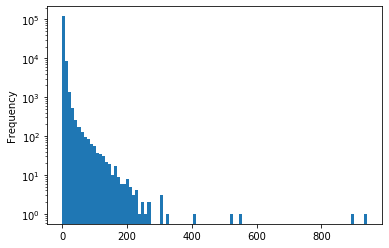

In [207]:
data['diameter'].plot.hist(bins=100, logy=True) #Distribution of diameters in the data set

In [208]:
for each in data['neo'].unique():
    print(each, (data['neo']==each).sum()) #Number of NEOs

N 130439
Y 798


In [209]:
for each in data['pha'].unique():
    print(each, (data['pha']==each).sum()) #Number of PHAs

N 131040
Y 197


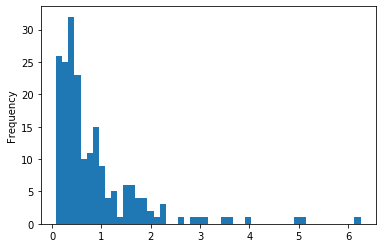

In [210]:
data1 = data[data['pha']=='Y']
data1['diameter'].plot.hist(bins=50) #Distribution of diameters of Potentially Hazardous Asteroids 

In [211]:
data.loc[(data['diameter'] > 1) & (data['pha']=='Y')] #Potentially hazardous and big asteroids

,full_name,neo,pha,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,class,moid,moid_jup
1619,1620 Geographos (1951 RA),Y,Y,15.30,2.560,0.2900,0.335455,1.245667,0.827802,13.337043,337.186975,276.956068,235.112642,1.663532,0.708926,1.390308,APO,0.030354,3.457470
1861,1862 Apollo (1932 HA),Y,Y,16.25,1.500,0.2500,0.559917,1.470345,0.647074,6.354732,35.627131,285.975958,88.546479,2.293616,0.552809,1.782942,APO,0.025814,3.071040
2101,2102 Tantalus (1975 YA),Y,Y,16.00,1.649,0.2450,0.299148,1.290151,0.904204,64.006994,94.362492,61.541062,81.986470,1.676097,0.672579,1.465443,APO,0.043465,3.762090
2200,2201 Oljato (1947 XC),Y,Y,15.30,1.800,0.4328,0.712886,2.174084,0.624211,2.522429,74.987033,98.247249,203.115734,3.723957,0.307461,3.205698,APO,0.003125,1.247080
3121,3122 Florence (1981 ET3),Y,Y,14.00,4.900,0.2310,0.422945,1.768975,1.020797,22.142496,336.063856,27.847815,50.437796,2.517153,0.418911,2.352831,AMO,0.045333,2.998210
3199,3200 Phaethon (1983 TB),Y,Y,14.30,6.250,0.1066,0.889831,1.271368,0.140065,22.259512,265.217696,322.186710,228.957243,2.402671,0.687539,1.433557,APO,0.019436,2.737390
3670,3671 Dionysus (1984 KD),Y,Y,16.40,1.500,0.1600,0.541680,2.198591,1.007659,13.534095,82.085809,204.263008,7.994516,3.389524,0.302334,3.260055,APO,0.020682,1.838810
4014,4015 Wilson-Harrington (1979 VA),Y,Y,15.99,4.000,0.0500,0.631187,2.625914,0.968471,2.798295,266.817701,95.370134,171.017716,4.283357,0.231624,4.255289,APO,0.043010,1.223940
4182,4183 Cuno (1959 LM),Y,Y,14.10,3.651,0.0970,0.634139,1.983072,0.725529,6.704037,294.867492,236.349006,331.350530,3.240615,0.352936,2.792647,APO,0.028330,1.794660
4485,4486 Mithra (1987 SB),Y,Y,15.50,1.849,0.2970,0.663023,2.199298,0.741112,3.039699,82.236300,168.906481,33.948749,3.657483,0.302189,3.261626,APO,0.046289,1.404890


## Exploratory Data Analysis

In [3]:
def dist(par):
    data[par].hist(bins=100) #Distribution of parameter
    print('Data available for (%):', 100-data[par].isna().sum()/data.shape[0]*100) #Amount of data available
    print('Mean:', data[par].mean()) #Mean of parameter
    print('Range:', data[par].min(), data[par].max()) #Range of parameter

Data available for (%): 100.0
Mean: 15.123495119516603
Range: 3.0 27.5


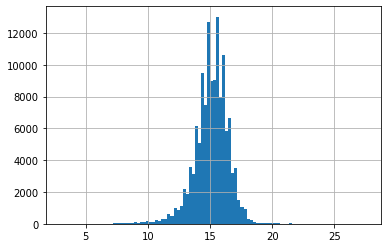

In [212]:
dist('H')

In [213]:
data.loc[data['H'] < 6] #Bright asteroids

,full_name,neo,pha,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,class,moid,moid_jup
0,1 Ceres,N,N,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,4.608202,MBA,1.594780,2.09753
1,2 Pallas,N,N,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,4.619880,MBA,1.234290,1.85093
2,3 Juno,N,N,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,4.358696,MBA,1.034290,2.18899
3,4 Vesta,N,N,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,3.628837,MBA,1.139480,2.46988
5,6 Hebe,N,N,5.80,185.180,0.2679,0.203219,2.424533,1.931822,14.739653,138.643431,239.736273,190.686496,2.917243,0.261073,3.775290,MBA,0.973673,2.63933
6,7 Iris,N,N,5.60,199.830,0.2766,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,3.688835,MBA,0.850693,2.47160
9,10 Hygiea,N,N,5.50,407.120,0.0717,0.112117,3.142435,2.790114,3.831786,283.198444,312.412932,222.850543,3.494757,0.176931,5.570674,MBA,1.780300,1.53545
14,15 Eunomia,N,N,5.20,231.689,0.2480,0.186178,2.643690,2.151494,11.753619,292.934798,98.595250,15.025609,3.135886,0.229292,4.298569,MBA,1.194900,2.41849
15,16 Psyche,N,N,5.90,226.000,0.1203,0.133531,2.922776,2.532494,3.096560,150.040712,229.026788,7.048518,3.313057,0.197247,4.996909,MBA,1.535860,2.14831
28,29 Amphitrite,N,N,5.90,189.559,0.2160,0.072959,2.554818,2.368421,6.081868,356.335868,63.273570,20.897466,2.741216,0.241359,4.083648,MBA,1.387470,2.47584


Data available for (%): 0.08736573941516212
Mean: 0.17873949579831935
Range: -0.25 0.6


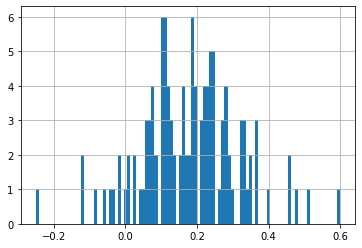

In [97]:
dist('G')

Data available for (%): 100.0
Mean: 0.13239202663882899
Range: 0.001 1.0


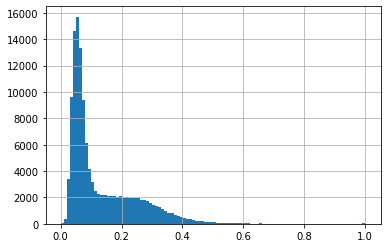

In [214]:
dist('albedo')

Data available for (%): 0.01027832228413672
Mean: 7.821927595681427
Range: 2.0999999999999998e-09 62.6284


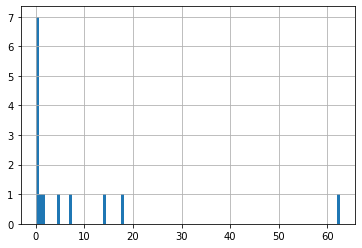

In [99]:
dist('GM')

Data available for (%): 0.7378367068255471
Mean: 0.7688437810945272
Range: 0.58 1.077


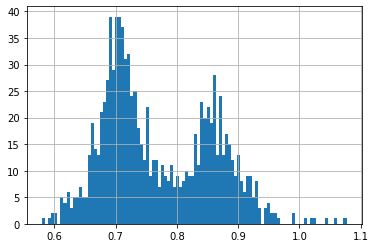

In [100]:
dist('BV')

Data available for (%): 0.7084700717280015
Mean: 0.3641077720207254
Range: 0.12 0.655


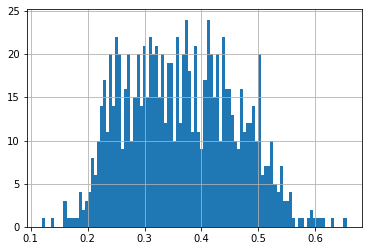

In [101]:
dist('UB')

Data available for (%): 0.0007341658774322468
Mean: -0.33
Range: -0.33 -0.33


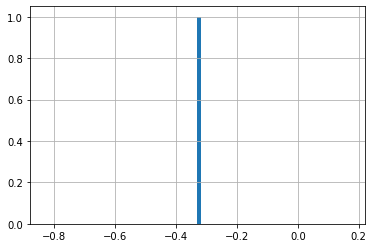

In [102]:
dist('IR')

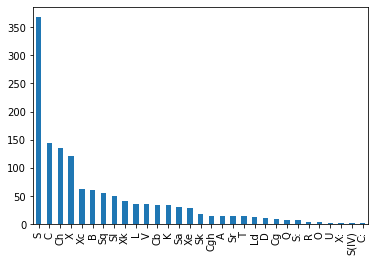

In [103]:
data['spec_B'].value_counts().plot(kind='bar')

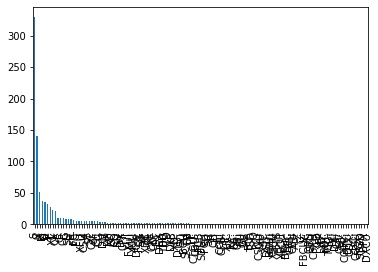

In [104]:
data['spec_T'].value_counts().plot(kind='bar')

Data available for (%): 100.0
Mean: 0.145855789081035
Range: 0.00030951347489259685 0.983789019143648


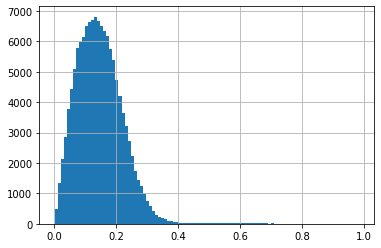

In [215]:
dist('e')

Data available for (%): 100.0
Mean: 2.827961081021657
Range: 0.6262100164727521 376.13329731336734


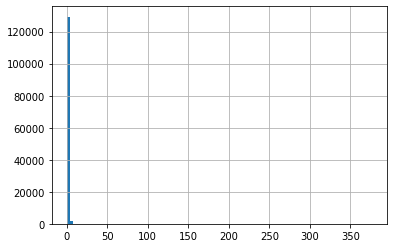

In [216]:
dist('a')

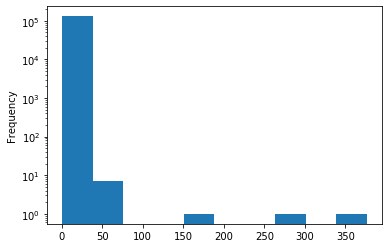

In [217]:
data['a'].plot(kind='hist', logy=True) #negative a = hyperbolic orbit

Data available for (%): 100.0
Mean: 2.4132459763620484
Range: 0.08181996323536155 40.3184767342801


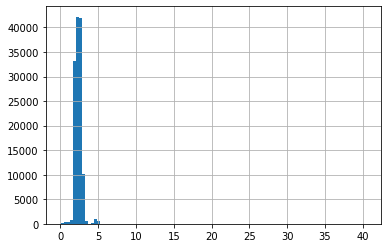

In [218]:
dist('q') #perihelion distance

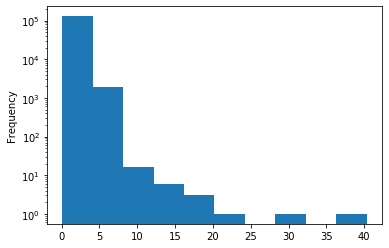

In [219]:
data['q'].plot(kind='hist', logy=True)

Data available for (%): 100.0
Mean: 10.070010771028816
Range: 0.02205649158242794 170.33459490675267


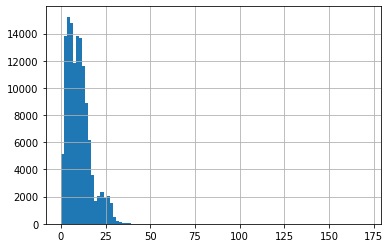

In [220]:
dist('i') #inclination; angle with respect to x-y ecliptic plane

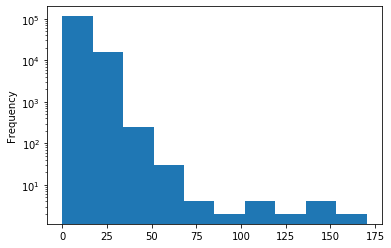

In [221]:
data['i'].plot(kind='hist', logy=True)

Data available for (%): 100.0
Mean: 169.48751109514353
Range: 0.0004184154679910986 359.99979315867927


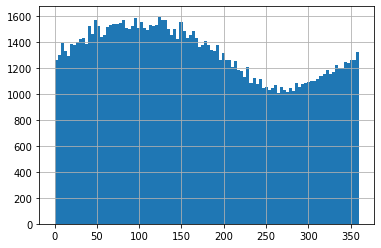

In [222]:
dist('om') #longitude of the ascending node

Data available for (%): 100.0
Mean: 181.78113176035413
Range: 0.000129994414919452 359.9980750530045


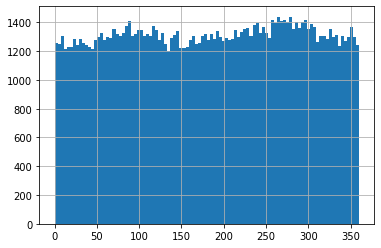

In [223]:
dist('w') #angle made by keeping the body at the origin and the perhelion on the axes

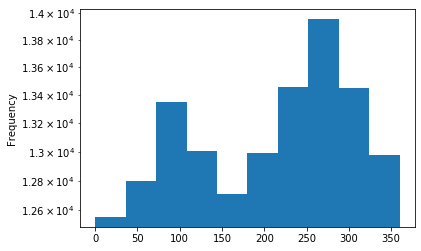

In [224]:
data['w'].plot(kind='hist', logy=True)

Data available for (%): 100.0
Mean: 184.5006136930817
Range: 0.006017576038631425 359.9992260090895


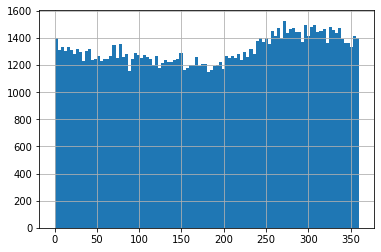

In [225]:
dist('ma') #mean anomaly

Data available for (%): 100.0
Mean: 3.2426761856812654
Range: 0.9999544572357036 746.1691049445509


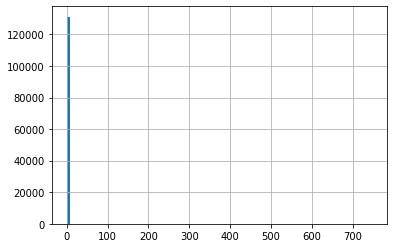

In [226]:
dist('ad') #aphelion distance

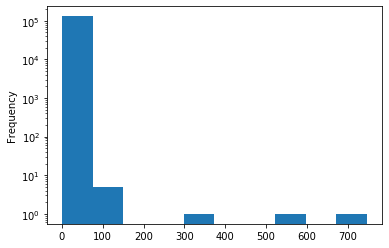

In [227]:
data['ad'].plot(kind='hist', logy=True, bins=10)

Data available for (%): 100.0
Mean: 0.21796513638181483
Range: 0.0001351112158411857 1.988950885030419


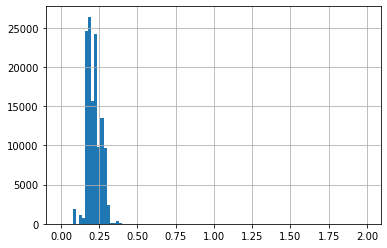

In [228]:
dist('n') #mean motion =  angular speed required for a body to complete one orbit

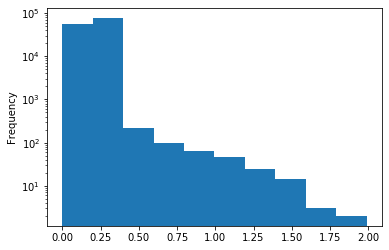

In [229]:
data['n'].plot(kind='hist', logy=True)

Data available for (%): 100.0
Mean: 4.919495893190086
Range: 0.495550840790361 7294.925719017249


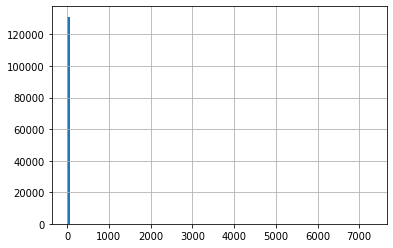

In [230]:
dist('per_y') #orbital period

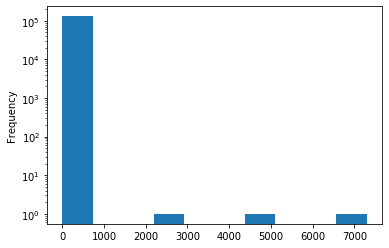

In [231]:
data['per_y'].plot(kind='hist', logy=True)

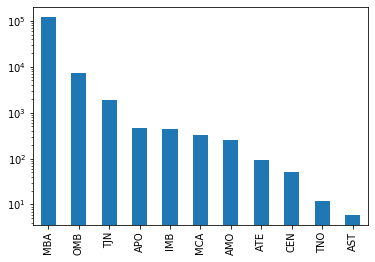

In [232]:
data['class'].value_counts().plot(kind='bar', logy=True) #Distribution among the classes

In [233]:
data['class'].value_counts() #Number of asteroids in each class

MBA    120422
OMB      7302
TJN      1873
APO       454
IMB       450
MCA       324
AMO       253
ATE        91
CEN        50
TNO        12
AST         6
Name: class, dtype: int64

Data available for (%): 100.0
Mean: 1.4303825276536797
Range: 2.6556500000000002e-05 39.3603


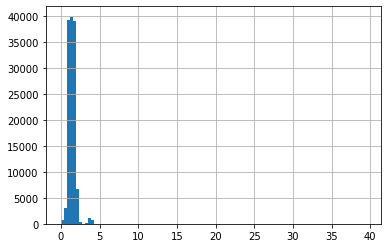

In [234]:
dist('moid')

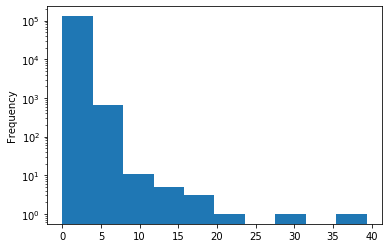

In [235]:
data['moid'].plot(kind='hist', logy=True)

Data available for (%): 100.0
Mean: 2.051135051182259
Range: 7.24041e-05 35.5654


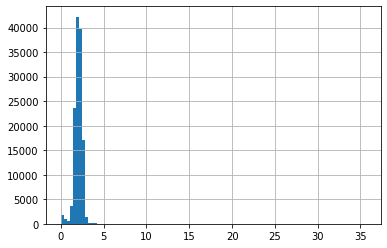

In [236]:
dist('moid_jup')

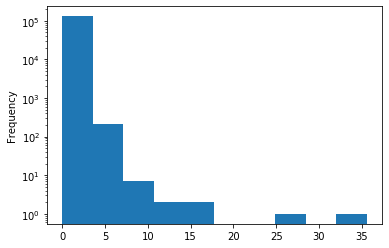

In [237]:
data['moid_jup'].plot(kind='hist', logy=True)

## Correlation matrix

In [64]:
df = data.dropna(axis=1)
df.drop(['neo', 'pha', 'ast_class'], axis = 1) #These features are based on other features and are just representational

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,moid,moid_jup
0,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,4.608202,1.594780,2.097530
1,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,4.619880,1.234290,1.850930
2,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,4.358696,1.034290,2.188990
3,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,3.628837,1.139480,2.469880
4,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,4.129814,1.095750,1.959680
5,5.80,185.180,0.2679,0.203219,2.424533,1.931822,14.739653,138.643431,239.736273,190.686496,2.917243,0.261073,3.775290,0.973673,2.639330
6,5.60,199.830,0.2766,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,3.688835,0.850693,2.471600
7,6.50,147.491,0.2260,0.155833,2.201415,1.858362,5.889081,110.876524,285.458915,315.318013,2.544467,0.301753,3.266337,0.875980,2.870600
8,6.30,190.000,0.1180,0.123300,2.386189,2.091972,5.576494,68.909459,6.337325,23.912204,2.680407,0.267391,3.686087,1.107110,2.552960
9,5.50,407.120,0.0717,0.112117,3.142435,2.790114,3.831786,283.198444,312.412932,222.850543,3.494757,0.176931,5.570674,1.780300,1.535450


In [66]:
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,moid,moid_jup,neo,pha,ast_class
H,1,0.573641,0.221704,0.213734,0.129266,0.366733,0.0718428,0.000838409,0.00880018,0.0076361,0.0700803,0.311603,0.0360652,0.363093,0.211482,0.209225,0.10763,0.293622
diameter,0.573641,1,0.114903,0.0523809,0.145007,0.328213,0.0676846,0.00216937,0.00320203,0.00294777,0.0935825,0.198285,0.0499823,0.331146,0.112722,0.0363214,0.0192532,0.17227
albedo,0.221704,0.114903,1,0.0232449,0.118405,0.27858,0.0748766,0.0030978,0.00276431,0.000770757,0.0745101,0.375514,0.0212506,0.282558,0.378815,0.0335524,0.0192365,0.155025
e,0.213734,0.0523809,0.0232449,1,0.019116,0.520411,0.160012,0.000544274,0.012337,0.0115063,0.113767,0.2054,0.0497712,0.49605,0.0303997,0.345002,0.16923,0.268267
a,0.129266,0.145007,0.118405,0.019116,1,0.370761,0.164622,0.000148743,0.0027645,0.00562618,0.985937,0.280445,0.941304,0.374133,0.190244,0.0530533,0.0311442,0.204624
q,0.366733,0.328213,0.27858,0.520411,0.370761,1,0.108595,0.00102678,0.00726985,0.0478111,0.210338,0.706203,0.112913,0.996935,0.516423,0.233788,0.123182,0.558043
i,0.0718428,0.0676846,0.0748766,0.160012,0.164622,0.108595,1,0.0150076,0.00659731,0.00512723,0.153749,0.143624,0.103305,0.147388,0.129748,0.107784,0.0283542,0.00833609
om,0.000838409,0.00216937,0.0030978,0.000544274,0.000148743,0.00102678,0.0150076,1,0.106797,0.00372934,0.000341338,0.00562497,0.000571046,0.00184829,0.0154488,0.00386828,0.000923985,0.00239965
w,0.00880018,0.00320203,0.00276431,0.012337,0.0027645,0.00726985,0.00659731,0.106797,1,0.00194179,0.00160189,0.00403206,0.00175526,0.00708385,0.0207731,0.00141235,0.00293216,0.000436485
ma,0.0076361,0.00294777,0.000770757,0.0115063,0.00562618,0.0478111,0.00512723,0.00372934,0.00194179,1,0.00268092,0.0283848,0.00664688,0.0482589,0.065714,0.00347983,0.00252838,0.0417779


In [67]:
for column in df.columns:
    if df[column].dtypes == 'float64':
        df[column] = np.log10(df[column])

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
df

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,moid,moid_jup,neo,pha,ast_class
0,0.531479,2.972851,-1.045757,-1.119135,0.442349,0.408017,1.025063,1.904745,1.866864,1.888584,0.474165,-0.669819,0.663531,0.202701,0.321708,-inf,-inf,0.778151
1,0.623249,2.736397,-0.995679,-0.638325,0.443082,0.329588,1.541990,2.238108,2.491645,2.161295,0.532977,-0.670918,0.664631,0.091417,0.267390,-inf,-inf,0.778151
2,0.726727,2.391986,-0.669586,-0.590174,0.426232,0.297258,1.113644,2.230069,2.394568,2.098420,0.525546,-0.645644,0.639357,0.014642,0.340244,-inf,-inf,0.778151
3,0.477121,2.720490,-0.373865,-1.051971,0.373173,0.332824,0.853806,2.016243,2.178195,1.981646,0.410090,-0.566055,0.559767,0.056707,0.392676,-inf,-inf,0.778151
4,0.838849,2.028160,-0.562249,-0.719164,0.410615,0.318610,0.729766,2.150974,2.554669,1.251549,0.486495,-0.622218,0.615930,0.039711,0.292185,-inf,-inf,0.778151
5,0.763428,2.267594,-0.572027,-0.692036,0.384628,0.285967,1.168487,2.141899,2.379734,2.280320,0.464973,-0.583238,0.576950,-0.011587,0.421494,-inf,-inf,0.778151
6,0.748188,2.300661,-0.558148,-0.637998,0.377921,0.264330,0.742065,2.414244,2.161971,2.393445,0.467877,-0.573177,0.566889,-0.070227,0.392978,-inf,-inf,0.778151
7,0.812913,2.168766,-0.645892,-0.807341,0.342702,0.269130,0.770048,2.044840,2.455544,2.498749,0.405597,-0.520349,0.514061,-0.057506,0.457973,-inf,-inf,0.778151
8,0.799341,2.278754,-0.928118,-0.909036,0.377705,0.320556,0.746361,1.838279,0.801906,1.378620,0.428201,-0.572853,0.566566,0.044191,0.407044,-inf,-inf,0.778151
9,0.740363,2.609722,-1.144481,-0.950327,0.497266,0.445622,0.583401,2.452091,2.494729,2.348014,0.543417,-0.752195,0.745908,0.250493,0.186236,-inf,-inf,0.778151


In [69]:
df = df.dropna(axis=1)
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,moid,moid_jup,neo,pha,ast_class
H,1,0.834582,0.244543,0.161263,0.326684,0.355533,0.0695503,0.00179319,0.00633452,0.00297782,0.24368,0.326684,0.326684,0.344396,0.250451,nan,nan,0.250201
diameter,0.834582,1,0.282643,0.170019,0.555585,0.539205,0.119685,0.00272276,0.00492672,0.0111024,0.467928,0.555585,0.555585,0.526686,0.37859,nan,nan,0.347292
albedo,0.244543,0.282643,1,0.0123695,0.367916,0.271775,0.0492046,0.00187699,0.00150591,0.00893694,0.375939,0.367916,0.367916,0.248167,0.225495,nan,nan,0.114654
e,0.161263,0.170019,0.0123695,1,0.179905,0.565897,0.0541066,0.00243135,0.0148639,0.0012419,0.196542,0.179905,0.179905,0.513385,0.0572358,nan,nan,0.169338
a,0.326684,0.555585,0.367916,0.179905,1,0.851442,0.183649,0.00109667,0.000717888,0.0112682,0.916047,1,1,0.783327,0.70315,nan,nan,0.483907
q,0.355533,0.539205,0.271775,0.565897,0.851442,1,0.0884065,0.000439607,0.00764187,0.0148853,0.580895,0.851442,0.851442,0.932274,0.557644,nan,nan,0.575843
i,0.0695503,0.119685,0.0492046,0.0541066,0.183649,0.0884065,1,0.0114986,0.00340134,0.0041284,0.218758,0.183649,0.183649,0.0992682,0.0862939,nan,nan,0.00183246
om,0.00179319,0.00272276,0.00187699,0.00243135,0.00109667,0.000439607,0.0114986,1,0.0293318,0.00149191,0.000725786,0.00109667,0.00109667,0.00128027,0.00478333,nan,nan,0.00208364
w,0.00633452,0.00492672,0.00150591,0.0148639,0.000717888,0.00764187,0.00340134,0.0293318,1,0.00178935,0.00774721,0.000717888,0.000717888,0.00298855,0.012282,nan,nan,0.00125982
ma,0.00297782,0.0111024,0.00893694,0.0012419,0.0112682,0.0148853,0.0041284,0.00149191,0.00178935,1,0.00890314,0.0112682,0.0112682,0.0105659,0.0394628,nan,nan,0.0211443


## Pre-processing data

In [39]:
from sklearn.preprocessing import OrdinalEncoder
encoder_bin = OrdinalEncoder() #Binary encoder for NEO and PHA

neo = data['neo'].values
pha = data['pha'].values

encoder_bin.fit(neo.reshape(-1,1))

print(encoder_bin.categories_)

neo = encoder_bin.transform(neo.reshape(-1,1))
pha = encoder_bin.transform(pha.reshape(-1,1))

[array(['N', 'Y'], dtype=object)]


In [40]:
data = data.drop(['neo', 'pha'], axis = 1)

In [41]:
data = data.assign(neo=neo)
data = data.assign(pha=pha) #Adding updated columns

In [42]:
data = data.drop(['full_name'], axis = 1) #Not required for models

In [43]:
#Encoder for asteroid orbit class
encoder_class = OrdinalEncoder() 

ast_class = data['class'].values

encoder_class.fit(ast_class.reshape(-1,1))

print(encoder_class.categories_)

ast_class = encoder_class.transform(ast_class.reshape(-1,1))

[array(['AMO', 'APO', 'AST', 'ATE', 'CEN', 'IMB', 'MBA', 'MCA', 'OMB',
       'TJN', 'TNO'], dtype=object)]


In [44]:
data = data.drop(['class'], axis = 1)
data = data.assign(ast_class=ast_class)

In [45]:
data

,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,per_y,moid,moid_jup,neo,pha,ast_class
0,3.40,939.400,0.0900,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,4.608202,1.594780,2.097530,0.0,0.0,6.0
1,4.20,545.000,0.1010,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,4.619880,1.234290,1.850930,0.0,0.0,6.0
2,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,4.358696,1.034290,2.188990,0.0,0.0,6.0
3,3.00,525.400,0.4228,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,3.628837,1.139480,2.469880,0.0,0.0,6.0
4,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,4.129814,1.095750,1.959680,0.0,0.0,6.0
5,5.80,185.180,0.2679,0.203219,2.424533,1.931822,14.739653,138.643431,239.736273,190.686496,2.917243,0.261073,3.775290,0.973673,2.639330,0.0,0.0,6.0
6,5.60,199.830,0.2766,0.230145,2.387375,1.837933,5.521598,259.563943,145.201545,247.425811,2.936818,0.267192,3.688835,0.850693,2.471600,0.0,0.0,6.0
7,6.50,147.491,0.2260,0.155833,2.201415,1.858362,5.889081,110.876524,285.458915,315.318013,2.544467,0.301753,3.266337,0.875980,2.870600,0.0,0.0,6.0
8,6.30,190.000,0.1180,0.123300,2.386189,2.091972,5.576494,68.909459,6.337325,23.912204,2.680407,0.267391,3.686087,1.107110,2.552960,0.0,0.0,6.0
9,5.50,407.120,0.0717,0.112117,3.142435,2.790114,3.831786,283.198444,312.412932,222.850543,3.494757,0.176931,5.570674,1.780300,1.535450,0.0,0.0,6.0


## Principal Component Analysis (In the works)

In [93]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data.to_numpy())
print(pca.explained_variance_ratio_)

[3.54929925e-01 3.35480302e-01 2.86192991e-01 1.91880323e-02
 2.79332653e-03 1.32049122e-03 4.44252624e-05 2.80296339e-05
 1.15152415e-05 6.36815597e-06 4.09294996e-06 2.44705469e-07
 1.41871846e-07 5.37729908e-08 3.10020799e-08 1.72957973e-08
 1.21014606e-08 2.82480803e-34]


## Splitting test and train set

In [46]:
from sklearn.model_selection import train_test_split
data = data.dropna(axis=1)
predictors = data.drop(['diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ad', 'n', 'ma', 'per_y', 'moid', 'moid_jup', 'neo', 'pha', 'ast_class'],axis=1) 

target = data['diameter']
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## Plotting function

In [53]:
import seaborn as sns

def plot(prediction, Y_test):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    
    ax1.set(xscale="log")
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax1.legend()
    
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated radius')
    ax2.legend()
    ax2.axis('scaled') #same x y scale

## ANN Implementation

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R-squared score: 0.9595432932860093


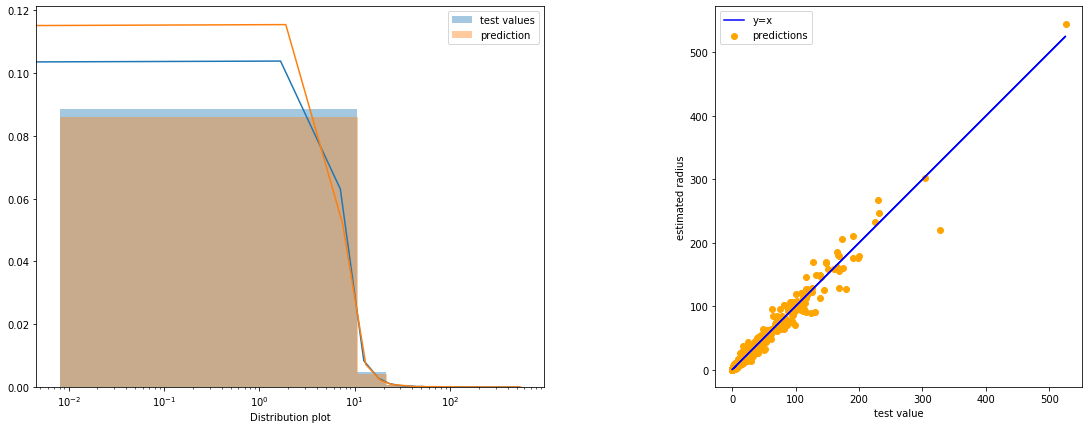

In [57]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()

# print(X_train)
ann.fit(X_train, Y_train)

pred_ann = ann.predict(X_test)

print('R-squared score:', r2_score(Y_test, pred_ann))
plot(pred_dt, Y_test)

## Decision Trees

R-squared score: 0.9746708546773438


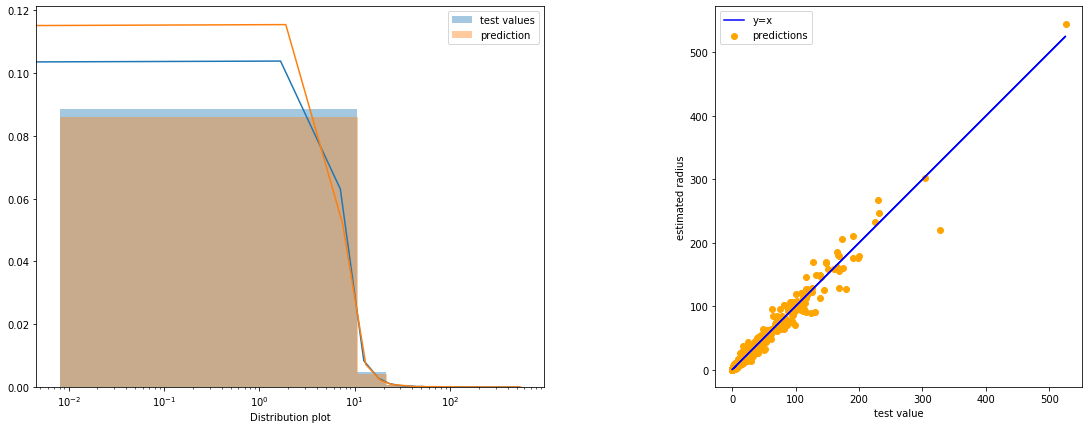

In [54]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()

dt.fit(X_train, Y_train)

pred_dt = dt.predict(X_test)

print('R-squared score:', r2_score(Y_test, pred_dt))
plot(pred_dt, Y_test)

## KNN

R-squared score: 0.9681224304885876


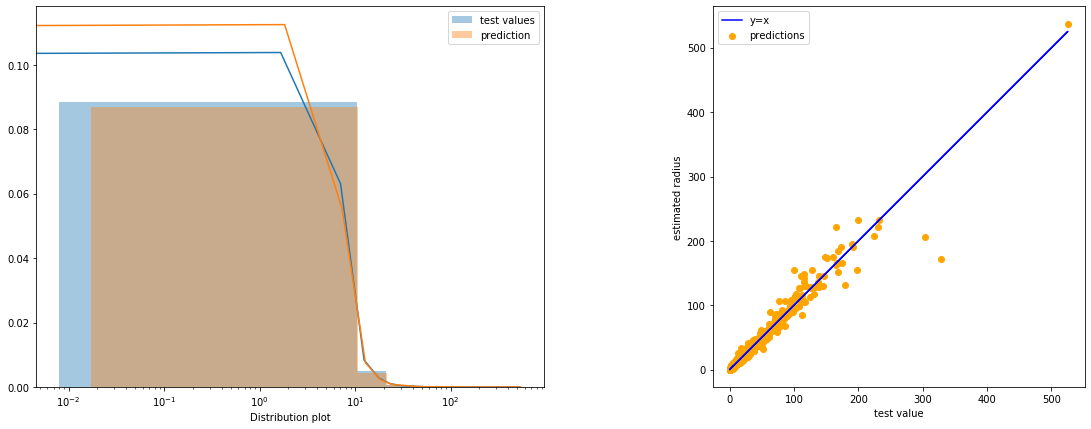

In [56]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=6)

knn.fit(X_train, Y_train)

pred_knn = knn.predict(X_test)

print('R-squared score:', r2_score(Y_test, pred_knn))

plot(pred_knn, Y_test)

## Random Forest

c:\users\shiti\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R-squared score: 0.9569441157933702


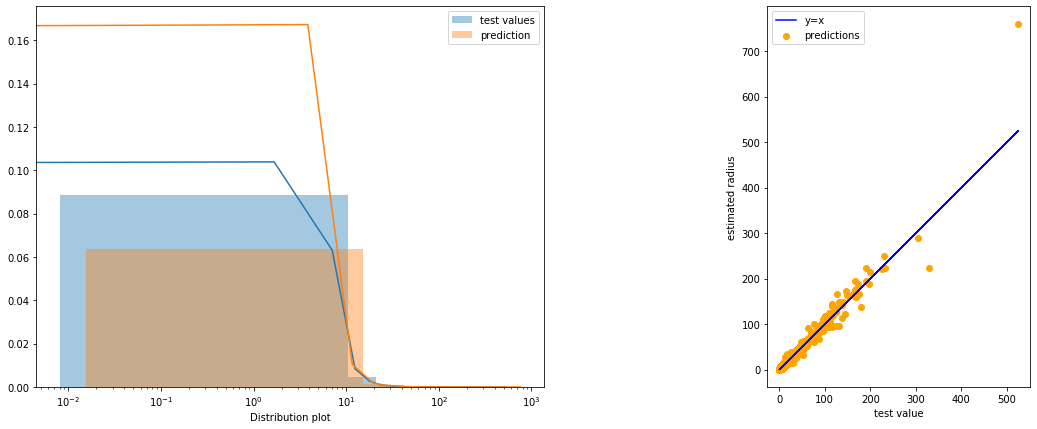

In [58]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_train, Y_train)

pred_forest = forest.predict(X_test)

print('R-squared score:', r2_score(Y_test, pred_forest))

plot(pred_forest, Y_test)

## Xgboost

R-squared score: 0.9486520519541581


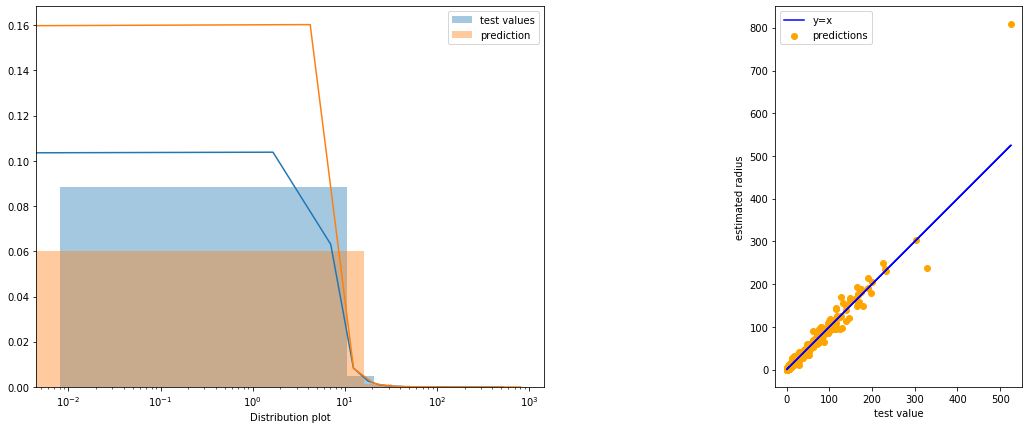

In [59]:
import xgboost as xgb 

xgboost = xgb.XGBRegressor()

xgboost.fit(X_train,Y_train)

pred_xgboost = xgboost.predict(X_test)

print('R-squared score:', r2_score(Y_test, pred_xgboost))

plot(pred_xgboost, Y_test)

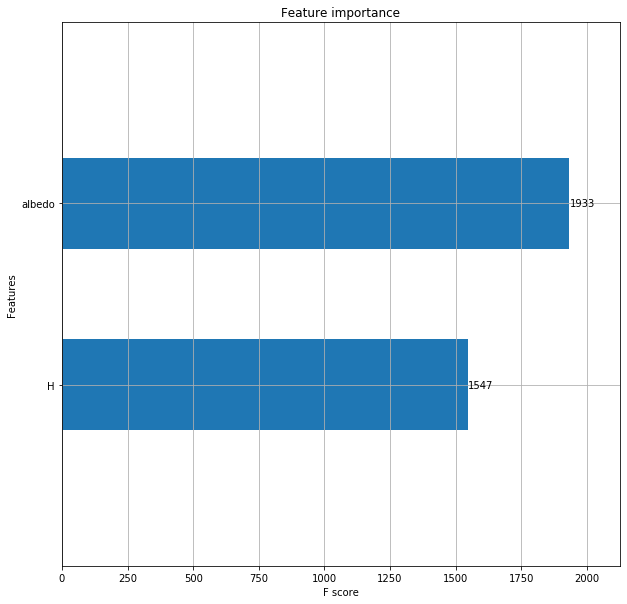

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost, height=0.5, ax=ax, importance_type='weight')
plt.show()